In [32]:
import requests
from bs4 import BeautifulSoup
import random
import time
from datetime import datetime
import json
import pandas as pd
import pickle
from urllib import request
import nltk, re, pprint
from nltk import word_tokenize

class RecipeScraper(object):
    def __init__(self, website='chowhound'):
        if website == 'chowhound':
            self.base_url = 'https://www.chowhound.com/recipes'
            print('using chowhound')
        else:
            self.base_url = None
        print(self.base_url)
        self.recipes = []
        self.base_pages = []
           
    def get_base_pages(self):
        page = requests.get(self.base_url)
        soup = BeautifulSoup(page.content, 'html.parser')
        
        for div in soup.find_all('div',class_="fr_bxfoot"):
            for a in div.find_all('a'):
                yield a.get('href')
                
    def get_recipe_pages(self,recipe_base_url):
        page = requests.get(recipe_base_url)
        soup = BeautifulSoup(page.content, 'html.parser')
        
        for div in soup.find_all('div',class_="fr_bxfoot"):
            yield div.find_all('a')[0].get('href')
            
    def get_recipe(self, recipe_url, base_url):
        page = requests.get(recipe_url)
        soup = BeautifulSoup(page.content, "html.parser")
        
        recipe_obj = {}
        instructions = []
        try:
            for div in soup.find_all('div',class_='fr_how_to'):
                for li in div.find_all('li'):
                    instructions.append(li.find_all('div')[0].text)
        except:
            pass
        
        if len(instructions) == 0:
            try:
                for div in soup.find_all('div',class_='frr_wrap',itemprop='recipeInstructions'):
                    for li in div.find_all('li'):
                        instructions.append(li.text)
            except:
                pass

        recipe_obj['base_url'] = base_url
        recipe_obj['recipe_url'] = recipe_url
        try:
            recipe_obj['instructions'] = list(enumerate(instructions))
            recipe_obj['ingredients'] = [i.text for i in soup.find_all('li',itemprop='ingredients')]
            if len(recipe_obj['ingredients']) == 0:
                recipe_obj['ingredients'] = [i.text for i in soup.find_all('li',itemprop='recipeIngredient')]
            recipe_obj['description'] = [p.text for p in soup.find_all('div', class_='frr_summary',itemprop='description')[0].find_all('p')]
        except:
            recipe_obj['instructions'] = []
            recipe_obj['ingredients'] = []
            recipe_obj['description'] = []
        return recipe_obj
    
    def update_recipes(self):
        base = [b for b in self.get_base_pages()]
        self.base_pages = list(set(base))
        print('getting links from '+str(len(self.base_pages))+' base urls')
        delay = 5
        count = 0
        t = datetime.now()
        for b in self.base_pages:
            print(b)
            page = requests.get(b)
            soup = BeautifulSoup(page.content, "html.parser")
            count += 1
            timeDelay = random.randrange(1, delay)
            time.sleep(timeDelay)
            if (len([i.text for i in soup.find_all('li',itemprop='ingredients')]) == 0)\
                &(len([i.text for i in soup.find_all('li',itemprop='recipeIngredient')]) == 0):
                self.recipes.extend([self.get_recipe(r, b) for r in self.get_recipe_pages(b)])
            else:
                self.recipes.extend(self.get_recipe(b, b))
            if count%10 == 0:
                print(str(count)+' base urls completed in: '+str(datetime.now()-t))
        
    def run_main(self):
        self.update_recipes()
        with open('recipe_data.json', 'w') as outfile:
            json.dump(self.recipes, outfile)


In [33]:
r_scraper = RecipeScraper()
r_scraper.run_main()

using chowhound
https://www.chowhound.com/recipes
getting links from 261 base urls
https://www.chowhound.com/recipes/bourbon
https://www.chowhound.com/recipes/halloween
https://www.chowhound.com/recipes/fondant
https://www.chowhound.com/recipes/garlic-powder
https://www.chowhound.com/recipes/meatballs
https://www.chowhound.com/recipes/dungeness-crab-fromage-blanc-potato-frittata-32073
https://www.chowhound.com/recipes/cocktails
https://www.chowhound.com/recipes/ghee
https://www.chowhound.com/recipes/kid-friendly
https://www.chowhound.com/recipes/molasses
10 base urls completed in: 0:04:09.765120
https://www.chowhound.com/recipes/summer
https://www.chowhound.com/recipes/hot-dog
https://www.chowhound.com/recipes/make-ahead
https://www.chowhound.com/recipes/tomato-paste
https://www.chowhound.com/recipes/dessert
https://www.chowhound.com/recipes/labor-day
https://www.chowhound.com/recipes/unicorn-rainbow-layer-cake-32072
https://www.chowhound.com/recipes/baked-italian-meatballs-spicy-tomat

https://www.chowhound.com/recipes/spicy-fried-chicken-cornmeal-crust-32066
https://www.chowhound.com/recipes/grilled-corn-cornbread-puree-popcorn-32063
160 base urls completed in: 1:18:29.081438
https://www.chowhound.com/recipes/cherry-tomatoes
https://www.chowhound.com/recipes/bell-peppers
https://www.chowhound.com/recipes/matcha-green-tea-ice-cream-sandwich-vegan-ginger-molasses-cookies-32082
https://www.chowhound.com/recipes/okra
https://www.chowhound.com/recipes/chives
https://www.chowhound.com/recipes/beets
https://www.chowhound.com/recipes/cotija
https://www.chowhound.com/recipes/spices
https://www.chowhound.com/recipes/shellfish
https://www.chowhound.com/recipes/rice-vinegar
170 base urls completed in: 1:22:56.138107
https://www.chowhound.com/recipes/canola-oil
https://www.chowhound.com/recipes/cherries
https://www.chowhound.com/recipes/southern
https://www.chowhound.com/recipes/easy
https://www.chowhound.com/recipes/picnic
https://www.chowhound.com/recipes/french
https://www.ch

NameError: name 'rs' is not defined

In [39]:
# with open('recipe_data.pkl', 'wb') as outfile:
#     pickle.dump(r_scraper.recipes, outfile)

In [7]:
import requests
from bs4 import BeautifulSoup
import random
import time
from datetime import datetime
import json
import pandas as pd
import pickle
from urllib import request
import nltk, re, pprint
from nltk import word_tokenize

In [40]:
len(r_scraper.recipes)

4850

In [8]:
with open('recipe_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
new_data = []
for obj in data[5:]:
    if type(obj)!=dict:
        pass
    else:
        new_data.append(obj)

In [10]:
df = pd.DataFrame(new_data)

In [756]:
df.iloc[0:10,3][3]

[(0,
  '\n1Muddle 12 to 20 mint leaves with simple syrup or sugar in a silver julep cup, then pour in bourbon.'),
 (1, '\n2Fill the glass with crushed ice, and garnish with more mint leaves.'),
 (2, 'Share on Facebook'),
 (3, 'Share on Reddit'),
 (4, 'Print'),
 (5, 'Email'),
 (6, 'Save (105)')]

In [11]:
def clean_ingredients(x):
    new_list = []
    for item in x:
        new_list.append((item.replace('\n','').replace('[','').replace('(','').replace(')','').replace('{{','')).replace('}}',''))
    return new_list

def clean_instructions(x):
    new_list = []
    for item in x:
        new_list.append((item[0],item[1].replace('\n','').replace('(','').replace(')','').replace('[','').replace('{{','')))
    return new_list

def is_meat(text_list):
    meat_list = [' chicken ', ' beef ', ' steak ', ' goat ', ' flank ', ' pork ',
                 ' tenderloin ', ' fish ', ' ham ',' duck ',' lamb ',' tuna ',' salami ',' sausage ']
    for item in text_list:
        for m in meat_list:
            if m in item:
                return 1
    return 0

def is_dairy(text_list):
    dairy_list = ['milk', 'cream', 'cheese', 'yogurt', 'butter', 'ice cream']
    for item in text_list:
        for d in dairy_list:
            if d in item:
                return 1
    return 0

In [12]:
df['num_ingredients'] = df.ingredients.apply(lambda x: len(x))
df['num_instructions'] = df.instructions.apply(lambda x: len(x))
df['topic'] = df.base_url.apply(lambda x: x.split('/')[-1])
df["ingredients"] = df['ingredients'].apply(lambda x: clean_ingredients(x))
df['is_dairy'] = df.ingredients.apply(lambda x: is_dairy(x))
df['is_meat'] = df.ingredients.apply(lambda x: is_meat(x))
df['instructions'] = df['instructions'].apply(lambda x: clean_instructions(x))

In [13]:
#unique(df['recipe_url'])
#len(df.recipe_url.unique())
df = df.drop_duplicates('recipe_url')

In [14]:
#take unique words from ingredients
df.shape

(1912, 10)

In [15]:
def remove_brackets(text_list):
    new_list = []
    for item in text_list:
        new_list.append(re.sub('[^\w\s]','', x))
        

In [16]:
#df['Ingredients'] = df.ingredients.apply(lambda x: remove_brackets(x))

Text(0,0.5,'Instructions')

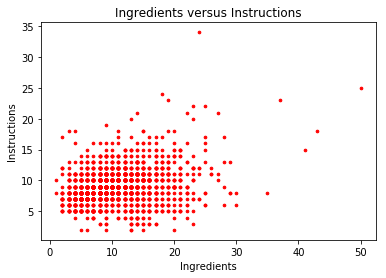

In [17]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
f1 = df['num_ingredients'].values
f2 = df['num_instructions'].values

X = np.array((zip(f1, f2)))
plt.scatter(f1, f2, c= 'red', s=7)
plt.title("Ingredients versus Instructions")
plt.xlabel("Ingredients")
plt.ylabel("Instructions")

In [93]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
x = df[['num_ingredients','num_instructions']]
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)

In [94]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Fitting for 2 clusters
Fitting for 3 clusters
Fitting for 4 clusters
Fitting for 5 clusters
Fitting for 6 clusters
Fitting for 7 clusters
Fitting for 8 clusters
Fitting for 9 clusters
Fitting for 10 clusters
Fitting for 11 clusters
Fitting for 12 clusters
Fitting for 13 clusters
Fitting for 14 clusters
Fitting for 15 clusters
Fitting for 16 clusters
Fitting for 17 clusters
Fitting for 18 clusters
Fitting for 19 clusters


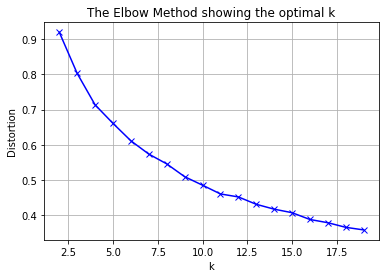

In [95]:
distortions = []
K = range(2,20)
for k in K:
    print('Fitting for ' +str(k)+' clusters')
    kmeans = KMeans(n_clusters=k).fit(x_scaled)
    kmeans.fit(x_scaled)
    distortions.append(sum(np.min(cdist(x_scaled,kmeans.cluster_centers_,'euclidean'),axis=1))/x_scaled.shape[0])
    
plt.plot(K,distortions,'bx-')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

In [96]:
cluster_map = KMeans(n_clusters=10).fit(x_scaled)
df['cluster_group'] = cluster_map.predict(x_scaled)


In [97]:
df.cluster_group.value_counts()

1    407
5    355
0    290
4    265
9    144
2    143
7    113
8     97
3     85
6     13
Name: cluster_group, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

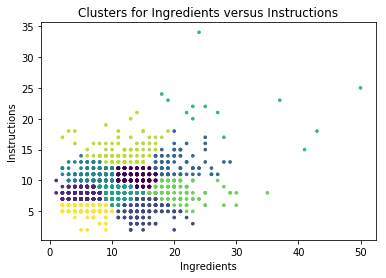

In [98]:
plt.scatter(f1, f2, s=7, c=df.cluster_group.values)
plt.title("Clusters for Ingredients versus Instructions")
plt.xlabel("Ingredients")
plt.ylabel("Instructions")
plt.show

In [25]:
y = df[['is_dairy','is_meat','num_ingredients','num_instructions']]
standard_scaler = preprocessing.StandardScaler()
y_scaled = standard_scaler.fit_transform(y)
y_scaled = pd.DataFrame(y_scaled)
#simple cluster looking at amount of 

Fitting for 2 clusters
Fitting for 3 clusters
Fitting for 4 clusters
Fitting for 5 clusters
Fitting for 6 clusters
Fitting for 7 clusters
Fitting for 8 clusters
Fitting for 9 clusters
Fitting for 10 clusters
Fitting for 11 clusters
Fitting for 12 clusters
Fitting for 13 clusters
Fitting for 14 clusters
Fitting for 15 clusters
Fitting for 16 clusters
Fitting for 17 clusters
Fitting for 18 clusters
Fitting for 19 clusters


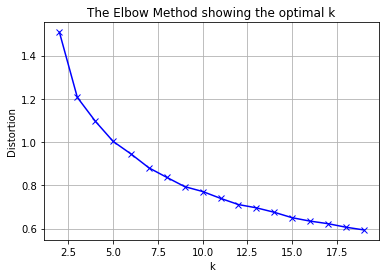

In [26]:
distortions = []
K = range(2,20)
for k in K:
    print('Fitting for ' +str(k)+' clusters')
    kmeans = KMeans(n_clusters=k).fit(y_scaled)
    kmeans.fit(y_scaled)
    distortions.append(sum(np.min(cdist(y_scaled,kmeans.cluster_centers_,'euclidean'),axis=1))/y_scaled.shape[0])
    
plt.plot(K,distortions,'bx-')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

In [27]:
cluster_map = KMeans(n_clusters=10).fit(y_scaled)
df['cluster_group'] = cluster_map.predict(y_scaled)


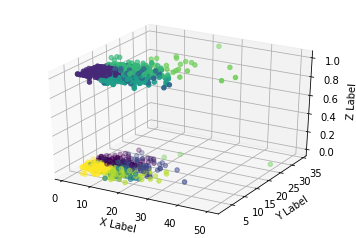

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = f1
ys = f2
zs = df.is_dairy.values
c = df.cluster_group.values
ax.scatter(xs, ys, zs, c=c)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [29]:
df['ingredients']

0       [1 14-ounce container vanilla ice cream, 2 das...
1       [1/4 cup bourbon, 1/4 cup Dijon mustard, 4 tea...
2       [1 ounce Cranberry and Citrus Sauce or other c...
3       [Fresh mint leaves, 1 teaspoon simple syrup or...
4       [2 ounces Wild Turkey bourbon, 1 ounce Firebal...
5       [5½ pounds chicken wingettes, , 1 cup store-bo...
6       [4 scoops vanilla bean ice cream, 1/2 ounce bo...
7       [2 ounces bourbon, 1 ounce freshly squeezed gr...
8       [1 cup whole milk, heated about 105°F to 115°F...
9       [10.4 ounces salt 2 cups Diamond Crystal koshe...
10      [Reserved neck and giblets from your turkey, 8...
11      [1 ½ cups all-purpose flour, ¼ teaspoon fine s...
12      [3/4 cup granulated sugar, 1/4 cup firmly pack...
13      [3 scoops chocolate ice cream, 2 tablespoons m...
14      [2 ounces rye whiskey or bourbon, 1 ounce swee...
15      [1 teaspoon superfine sugar, 2 dashes angostur...
16      [2 large eggs, 2 large egg yolks, 1/3 cup gran...
17      [1/4 c

In [30]:
def clean_ingredients2(i_list):
    temp = ' '.join(i_list)
    tokens = word_tokenize(temp)
    tagged = nltk.pos_tag(tokens)
    nouns = [tag[0] for tag in tagged if tag[1][0]=='N']
    cleaned = [w.lower() for w in nouns]
    return cleaned


In [31]:
df['ingredients_cleaned'] = df['ingredients'].apply(lambda x: clean_ingredients2(x))

In [35]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [36]:
recommendations['description'].iloc[2]

NameError: name 'recommendations' is not defined

In [37]:
idx = 10
list(df[['ingredients','ingredients_cleaned']].iloc[idx])

[['Reserved neck and giblets from your turkey',
  '8 tablespoons all-purpose flour',
  '6 tablespoons peanut or canola oil',
  '2 medium yellow onions, peeled and coarsely chopped',
  '2 celery stalks, coarsely chopped',
  '2 carrots, coarsely chopped',
  '8 cups turkey stock or low-sodium chicken broth 2 quarts',
  '3/4 cup bourbon',
  '2 bay leaves',
  '8 fresh sage leaves',
  '2/3 cup heavy cream'],
 ['neck',
  'giblets',
  'turkey',
  'tablespoons',
  'tablespoons',
  'peanut',
  'oil',
  'medium',
  'onions',
  'celery',
  'stalks',
  'carrots',
  'cups',
  'stock',
  'low-sodium',
  'chicken',
  'quarts',
  'cup',
  'bourbon',
  'bay',
  'sage',
  'cup',
  'cream']]

In [38]:
ingredients_set = df['ingredients']

In [39]:
ingredients_set.head()

0    [1 14-ounce container vanilla ice cream, 2 das...
1    [1/4 cup bourbon, 1/4 cup Dijon mustard, 4 tea...
2    [1 ounce Cranberry and Citrus Sauce or other c...
3    [Fresh mint leaves, 1 teaspoon simple syrup or...
4    [2 ounces Wild Turkey bourbon, 1 ounce Firebal...
Name: ingredients, dtype: object

In [40]:
ingredient_words = []
for i in ingredients_set:
    ingredient_words.append(i)

In [41]:
foods = []
for i in ingredients_set:
    foods += i
    
str_foods = " ".join(foods)

In [42]:
str_food = str_foods.split()

In [43]:
from urllib import request
from nltk.corpus import stopwords
text = nltk.Text(foods)
stop = stopwords.words('english')
tokens = word_tokenize(str_foods)
tokens = [t.lower() for t in tokens]
len(tokens)

125034

In [44]:
text.collocations()

Kosher salt Freshly ground black pepper; Salt Freshly ground black
pepper; 1/2 teaspoon kosher salt, plus more as needed 1/4 teaspoon
freshly ground black pepper, plus more as needed; Kosher salt, to
taste Freshly ground black pepper, to taste; kosher salt freshly
ground black pepper; Zest of 1 lime Juice of 2 limes; 2 tablespoons
light brown sugar 1 tablespoon freshly grated ginger; 1/4 cup soy
sauce or tamari 1/4 cup mirin; 3 tablespoons cider vinegar 3
tablespoons Worcestershire sauce; 1 tablespoon freshly grated ginger 3
cloves garlic, minced; 1 1/2 cups ketchup 1/2 cup packed dark brown
sugar; 1/3 cup light corn syrup 1/3 cup water; 12 eggs 6 tablespoons
mayonnaise; 1/4 cup mirin 2 tablespoons light brown sugar; 1 1/4-ounce
packet active dry yeast 2 1/4 teaspoons 1/4 cup plus 1 teaspoon
granulated sugar; 1 3-ounce carrot, peeled and cut into matchsticks
1/2 3-ounce daikon radish, peeled and cut into matchsticks; 1 large
carrot, peeled and cut into matchsticks 1 small red bell pepp

In [45]:
remove_words = ['⅛','1/3-inch','3-1/2-ounce','8-','7-1/2-inch-long','“','10-inch','life','mark,''1½-','ml',
                '1/2-inch-long','midsections','1⁄2','11-ounce','i.e.','750','10-12','–','6–6','32-ounce',';',
                'grade','pint-size','2-inch-wide','1/2-inches','120°f','best','34','lb','za','13-','3-pound',
                '20-ounce','170','e','trimmed','container','115°F','10.4','3/4-inch','15-pound','12-','diamond',
                'squeezed','baby','optional','plastic','1/4-ounce','105°F','whole','¾','1½','packed','1∕3','½',
                'store-bought','5½','’','14-ounce','good-quality','link','intro','recipe','cup','cut','cups',
                'teaspoon','teaspoons','and','chopped','or','to','into', 'above',',','¼','1','2','3','4','5','6',
                '7','8','9','10','11','12','1/8','tablespoons','tablespoon','ounces','ounce','ground','1/2','3/4','2/3','1/4',
                '1/3','fresh','finely','black','plus','large','granulated','ground','room','temperature','}','small',
                'white','thinly','coarsely','12','medium','needed','pounded','grated','peeled','freshly','pounds',
                'extract','fine','halved','dry','eggs','minced','sliced','slices','red','grated','all-purpose',
                'yellow','toasted','dry','light','heavy','pinched','shredded','hot','extra','half','serving',
                'removed','sea','dark','tomatoes','1-inch','frozen','lengthwise','white','crumbled','crushed',
                'cold','melted','1/2-inch','parts','thin','bell','diced','seeded','see','bunch','cooked','pinch',
                'low-sodium','thick','taste']
for i in remove_words:
    stop.append(i)

In [46]:
def stop_words(lis):
    new_list = []
    for word in tokens:  # iterating on a copy since removing will mess things up
        if word not in stop:
            new_list.append(word)
    return new_list
            

In [47]:
list_of_words = stop_words(tokens)
list_of_words = list(map(str.lower,list_of_words))
set_of_ingredients = set(list_of_words)

In [48]:
ingredient_string = ' '.join(list_of_words)

In [49]:
tokens_ingredients = word_tokenize(ingredient_string)

In [50]:
import nltk
from nltk import FreqDist

fdist1 = FreqDist(tokens_ingredients)

In [51]:

cols_to_use = [i[0] for i in fdist1.most_common(100)]

In [52]:
df['recipe_id'] = df.index
df.topic = df.topic.apply(lambda x: x.replace('-','_'))
df.head()

,base_url,description,ingredients,instructions,recipe_url,num_ingredients,num_instructions,topic,is_dairy,is_meat,cluster_group,ingredients_cleaned,recipe_id
0,https://www.chowhound.com/recipes/bourbon,[We’ve gotten all heretical and combined the f...,"[1 14-ounce container vanilla ice cream, 2 das...","[(0, Share on Facebook), (1, Share on Reddit),...",https://www.chowhound.com/recipes/bourbon-old-...,5,5,bourbon,1,0,1,"[container, vanilla, ice, cream, dashes, bitte...",0
1,https://www.chowhound.com/recipes/bourbon,[Flank steak is delicious when it’s marinated ...,"[1/4 cup bourbon, 1/4 cup Dijon mustard, 4 tea...","[(0, 1Combine bourbon, mustard, Worcestershire...",https://www.chowhound.com/recipes/bourbon-mari...,6,8,bourbon,0,1,4,"[cup, bourbon, cup, dijon, teaspoons, worceste...",1
2,https://www.chowhound.com/recipes/bourbon,[If an Amaretto Sour is considered dangerous f...,[1 ounce Cranberry and Citrus Sauce or other c...,"[(0, 1Combine cranberry sauce, bourbon, and am...",https://www.chowhound.com/recipes/cranberry-cu...,6,7,bourbon,0,0,9,"[ounce, cranberry, citrus, sauce, cranberry, o...",2
3,https://www.chowhound.com/recipes/bourbon,"[A classic cocktail recipe of bourbon, mint, a...","[Fresh mint leaves, 1 teaspoon simple syrup or...","[(0, 1Muddle 12 to 20 mint leaves with simple ...",https://www.chowhound.com/recipes/mint-julep-1...,4,7,bourbon,0,0,9,"[mint, teaspoon, syrup, superfine, sugar, ounc...",3
4,https://www.chowhound.com/recipes/bourbon,[Ever measured your drink pours by counting ou...,"[2 ounces Wild Turkey bourbon, 1 ounce Firebal...","[(0, 1Fill a tumbler with ice.), (1, 2Pour in ...",https://www.chowhound.com/recipes/wild-turkey-...,4,8,bourbon,0,0,9,"[ounces, wild, turkey, ounce, fireball, cinnam...",4


In [53]:
fields_to_keep = ['num_ingredients','num_instructions','topic','is_dairy','is_meat','ingredients_cleaned']
ingredient_df = df[fields_to_keep]

In [54]:
ingredient_df.shape

(1912, 6)

In [55]:
len(df.recipe_url.unique())

1912

In [56]:
list(ingredient_df)

['num_ingredients',
 'num_instructions',
 'topic',
 'is_dairy',
 'is_meat',
 'ingredients_cleaned']

In [57]:
ingredient_df = pd.get_dummies(ingredient_df,prefix='topic',columns=['topic'])

In [58]:
for col in cols_to_use:
    ingredient_df[col] = 0
    
for col in cols_to_use:
    ingredient_df[col] = ingredient_df['ingredients_cleaned'].apply(lambda x: col in x).astype(int)

In [59]:
ingredient_df.drop('ingredients_cleaned',axis=1,inplace=True)

In [60]:
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import euclidean
def recipe_recommender(list_of_ingredients, num_rec=3):
    vec = pd.DataFrame([{
        'num_ingredients': ingredient_df.num_ingredients.mean(),
        'num_instructions': ingredient_df.num_instructions.mean(),
        'is_dairy': 0,
        'is_meat': 0
    }])
    for col in list(ingredient_df):
        if 'topic_' in col:
            vec[col] = 0
        elif col in list_of_ingredients:
            vec[col] = 1
        else:
            vec[col] = 0
    vec = vec[list(ingredient_df)]
    
    rank_df = ingredient_df
    rank_df['score'] = rank_df.apply(lambda row: euclidean(np.array(vec).reshape(1, -1),np.array(row).reshape(1, -1)), axis=1)
    rank_df = rank_df.sort_values('score',ascending=False).reset_index()
    rank_df.rename(columns={'index':'recipe_id'},inplace=True)
    final = rank_df[['recipe_id']].head(num_rec).merge(df, on = 'recipe_id')
    return final


In [61]:
recommendations = recipe_recommender(['potato'])

In [62]:
recommendations['description'].iloc[0]

['Packed full of beguiling flavors and textures, this quinoa tabbouleh salad from San Francisco’s State Bird Provisions’ cookbook (nominated for a 2018 James Beard Foundation Book Award) is uniquely tasty and compels you to keep eating til the very last bite. The quinoa is fragrant with rosemary, garlic, and Meyer lemon, and makes a fluffy base for luscious dashi-infused shiitake mushrooms, firm ahi tuna marinated in a white soy sauce-lime vinaigrette, and a creamy bonito-rosemary aioli. Parsley brings freshness and a fried quinoa-pumpkin seed mixture adds crunch. And while, yes, there are a lot of ingredients—and several steps—to this recipe, you can make most parts of it in advance and spread the work out over a few days.',
 'For more inventive State Bird Provisions dishes, try their Black Butter-Balsamic Figs with Basil and Fontina Fondue recipe and Porcini Fried Rice with Balsamic Spring Onions, Ramps, and Porcini Aioli recipe.']

In [63]:
x = ingredient_df
standard_scaler = preprocessing.MinMaxScaler()
x_scaled = standard_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)

Fitting for 2 clusters
Fitting for 3 clusters
Fitting for 4 clusters
Fitting for 5 clusters
Fitting for 6 clusters
Fitting for 7 clusters
Fitting for 8 clusters
Fitting for 9 clusters
Fitting for 10 clusters
Fitting for 11 clusters
Fitting for 12 clusters
Fitting for 13 clusters
Fitting for 14 clusters
Fitting for 15 clusters
Fitting for 16 clusters
Fitting for 17 clusters
Fitting for 18 clusters
Fitting for 19 clusters


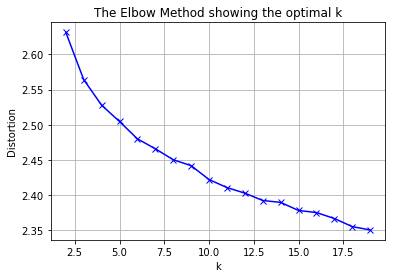

In [64]:
distortions = []
K = range(2,20)
for k in K:
    print('Fitting for ' +str(k)+' clusters')
    kmeans = KMeans(n_clusters=k).fit(x_scaled)
    kmeans.fit(x_scaled)
    distortions.append(sum(np.min(cdist(x_scaled,kmeans.cluster_centers_,'euclidean'),axis=1))/x_scaled.shape[0])
    
plt.plot(K,distortions,'bx-')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

In [65]:
cluster_map = KMeans(n_clusters=15).fit(x_scaled)
df['cluster_group'] = cluster_map.predict(x_scaled)


In [66]:
df.cluster_group.value_counts()

0     206
14    173
8     160
5     151
4     146
6     139
3     136
1     131
9     129
12    127
10     95
11     91
13     86
2      73
7      69
Name: cluster_group, dtype: int64

In [67]:
ingredient_df.sample(5)

,num_ingredients,num_instructions,is_dairy,is_meat,topic_4th_of_july,topic_academy_awards,topic_aioli,topic_allspice,topic_almonds,topic_anchovy,...,carrots,cider,mint,sprigs,paste,parmesan,flakes,cayenne,beaten,score
3292,3,12,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,12.529964
675,16,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19.131126
2080,7,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.000000
416,16,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,20.223748
2888,7,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.704700


In [68]:
for i in range(0,15):
    print(df[df.cluster_group==i]['topic'].sample(5))

3331      almonds
3810     cardamom
1618      peaches
310     chocolate
281         salad
Name: topic, dtype: object
602     lemon_juice
657       side_dish
2538        arugula
1798        parsley
2358           mint
Name: topic, dtype: object
2970         okra
2423    hot_sauce
492         vegan
1333         fish
3860         soup
Name: topic, dtype: object
2983      chives
1925       herbs
899       yogurt
3798    cardamom
1069    parmesan
Name: topic, dtype: object
2202      tequila
2220      tequila
48      halloween
1201        drink
1196        drink
Name: topic, dtype: object
450     4th_of_july
2512         lemons
3118       cherries
3796      ice_cream
1725         spring
Name: topic, dtype: object
3835    horseradish
3434         garlic
4477         dallas
2240          basil
2030      cucumbers
Name: topic, dtype: object
527         salt
2451       miami
3017       beets
2634    sriracha
1389        tuna
Name: topic, dtype: object
462      gluten_free
3778       ice_cream
33

In [69]:
for i in range(1,16):
    print(df[df.cluster_group==i]['topic'].sample(5))

2445             miami
834               corn
1175          eggplant
1860       los_angeles
4313    academy_awards
Name: topic, dtype: object
3850             soup
2970             okra
688     san_francisco
3693       barbecuing
708     san_francisco
Name: topic, dtype: object
1821    breadcrumbs
631       side_dish
1120        popcorn
2892        lobster
1749          tarts
Name: topic, dtype: object
4677     lime_juice
3478     triple_sec
7           bourbon
3463     triple_sec
4610    new_orleans
Name: topic, dtype: object
1968    baking_soda
330       chocolate
4151        cookies
643       side_dish
3510         baking
Name: topic, dtype: object
1014    steak_ingredients
1171             eggplant
2436                miami
170                summer
1101            christmas
Name: topic, dtype: object
937           fusion
211     tomato_paste
3599         chicken
1540      thai_basil
3428          garlic
Name: topic, dtype: object
1863    los_angeles
1889        camping
3300       

ValueError: a must be greater than 0

In [70]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wc.generate(ingredient_string)

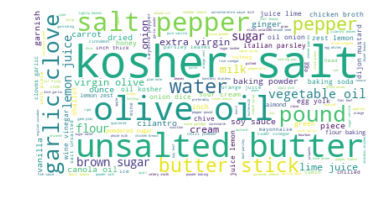

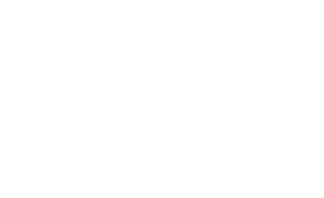

In [71]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(5, 3))
plt.axis("off")
plt.show()

In [72]:
Most_common_ingredients = pd.DataFrame(fdist1.most_common(20), columns = ["Ingredient", 'Quantity'])
#Most_common_ingredients = Most_common_ingredients.set_index("Ingredient",drop=True,inplace=True)
Most_common_ingredients['Ingredient'][2] = 'kosher salt'
Most_common_ingredients['Ingredient'][7] = 'unsalted butter'
Most_common_ingredients['Ingredient'][8] = 'olive oil'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [73]:
Most_common_ingredients = Most_common_ingredients.set_index('Ingredient')

Text(0.5,0,'Quantity')

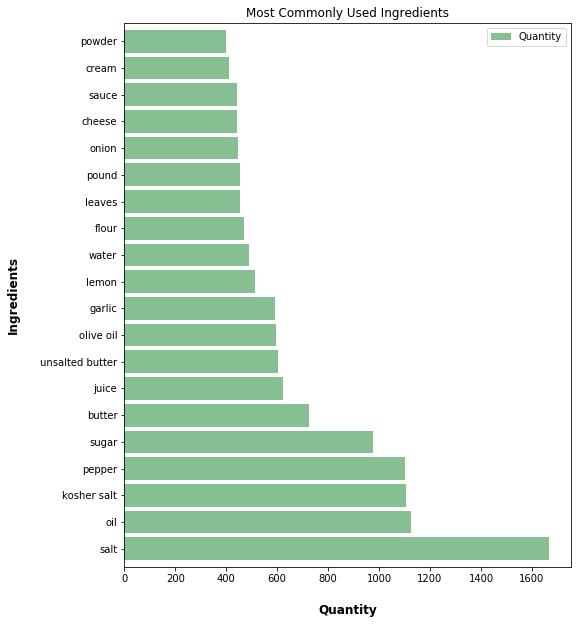

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
ax = Most_common_ingredients.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85, title = 'Most Commonly Used Ingredients')
# Set x-axis label
ax.set_ylabel("Ingredients", labelpad=20, weight='bold', size=12)
# Set y-axis label
ax.set_xlabel("Quantity", labelpad=20, weight='bold', size=12)


Text(0,0.5,'Recipes')

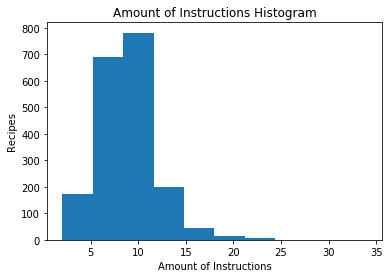

In [75]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

instruction_sets = df['num_instructions']
plt.hist(instruction_sets)
plt.title("Amount of Instructions Histogram")
plt.xlabel("Amount of Instructions")
plt.ylabel("Recipes")



Text(0,0.5,'Recipes')

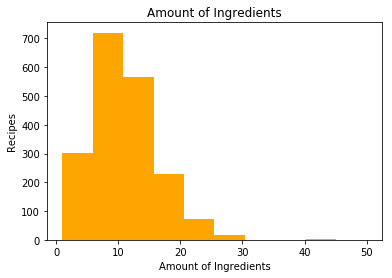

In [76]:
instruction_sets = df['num_ingredients']
plt.hist(instruction_sets, color='orange')
plt.title("Amount of Ingredients")
plt.xlabel("Amount of Ingredients")
plt.ylabel("Recipes")

In [77]:
df.sample(5)

,base_url,description,ingredients,instructions,recipe_url,num_ingredients,num_instructions,topic,is_dairy,is_meat,cluster_group,ingredients_cleaned,recipe_id
146,https://www.chowhound.com/recipes/summer,[You’ve had chocolate chip cookie ice cream sa...,"[8 tablespoons 1 stick unsalted butter, plus m...","[(0, Have all your ingredients at room tempera...",https://www.chowhound.com/recipes/chocolate-ch...,14,12,summer,1,0,8,"[tablespoons, stick, butter, pan, cup, sugar, ...",146
3391,https://www.chowhound.com/recipes/pasta,"[The classic Italian antipasti plate, with its...","[1/3 cup small-dice red onion, 3 tablespoons r...","[(0, 1Place the onion, vinegar, and oregano in...",https://www.chowhound.com/recipes/italian-past...,12,8,pasta,1,0,12,"[small-dice, onion, tablespoons, wine, vinegar...",3391
1869,https://www.chowhound.com/recipes/los-angeles,[In this easy recipe for mushroom melt sandwic...,"[1/2 pound wild mushrooms: chanterelles, wood ...","[(0, 1Heat the oven to 375°F and arrange a rac...",https://www.chowhound.com/recipes/dtla-mushroo...,10,9,los_angeles,1,0,12,"[pound, mushrooms, chanterelles, wood, ears, l...",1869
263,https://www.chowhound.com/recipes/labor-day,[An unbelievably rich and exuberant pie provin...,[6 ounces chocolate cookie wafers about 25 waf...,"[(0, Heat the oven to 350°F and arrange a rack...",https://www.chowhound.com/recipes/chocolate-mo...,9,10,labor_day,1,0,8,"[ounces, cookie, wafers, wafers, nabisco, famo...",263
512,https://www.chowhound.com/recipes/rice-flour,"[These pancakes, from Tartine All Day: Modern ...","[3 tablespoons almond flour, 2 tablespoons tap...","[(0, 1Combine the almond flour, tapioca flour/...",https://www.chowhound.com/recipes/fluffy-grain...,10,8,rice_flour,1,0,8,"[tablespoons, tablespoons, cup, tablespoon, oa...",512


In [78]:
graph_ingredients = df['num_ingredients']
graph_instructions = df['num_instructions']
graph_topic = df['topic']

In [79]:
graph_topic = pd.DataFrame(graph_ingredients,graph_instructions,graph_topic)

In [85]:
fields = ['num_ingredients','num_instructions','topic']
topics_df = df[fields]

In [91]:
topics_df = topics_df.set_index('topic')

Text(0.5,0,'num_ingredients')

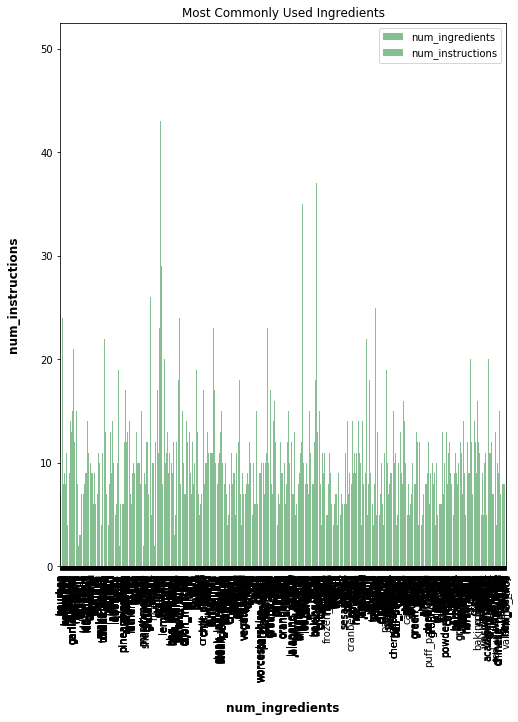

In [92]:
ax = topics_df.plot(kind='bar', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85, title = 'Most Commonly Used Ingredients')
# Set x-axis label
ax.set_ylabel("num_instructions", labelpad=20, weight='bold', size=12)
# Set y-axis label
ax.set_xlabel("num_ingredients", labelpad=20, weight='bold', size=12)